checkpoint: <class 'keras.callbacks.ModelCheckpoint'>
train_x: <class 'numpy.ndarray'>
train_y: <class 'numpy.ndarray'>
validation_x: <class 'numpy.ndarray'>
validation_y: <class 'numpy.ndarray'>
Epoch 1/20
8/8 [==============================] - 39s 807ms/step - loss: 0.9707 - accuracy: 0.5163 - val_loss: 0.6935 - val_accuracy: 0.5022
Epoch 2/20
8/8 [==============================] - 4s 493ms/step - loss: 0.8179 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 4s 531ms/step - loss: 0.7900 - accuracy: 0.5097 - val_loss: 0.6931 - val_accuracy: 0.4957
Epoch 4/20
8/8 [==============================] - 4s 537ms/step - loss: 0.7242 - accuracy: 0.5558 - val_loss: 0.6956 - val_accuracy: 0.5022
Epoch 5/20
8/8 [==============================] - 4s 547ms/step - loss: 0.7232 - accuracy: 0.5538 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 4s 534ms/step - loss: 0.7065 - accuracy: 0.5780 - val

No handles with labels found to put in legend.


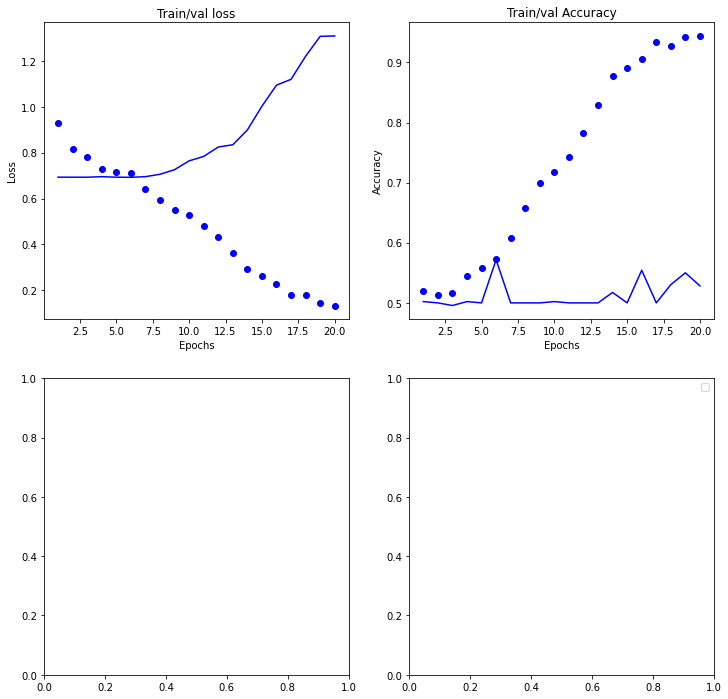

In [1]:
#imported for system and file managing usage
import sys
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow.keras.optimizers as opt
from keras.callbacks import ModelCheckpoint

#added to access the modules that placed in sub folder
sys.path.append('./modules')

#added to read special fucntions
from data import *
from plotter import *
from balanceData import *
from divideData import *
from models.gru.gru import *
from models.lstm.lstm import *
from models.rnn.rnn import *


# Define some parameters
FUTURE_PERIOD_PREDICT = 1
SEQ_LEN = 20
validation_percent = 15
test_percent = 20
EPOCHS = 20
BATCH_SIZE = 256


filePath = '/home/cryptocurrency_Forcasting/dataset/Binance_BTCUSDT_1hour.csv'

# Read the data from .csv
data = readData(filePath, FUTURE_PERIOD_PREDICT)

# divide data to train, validation, test sets 
train_data, validation_data, test_data = divide_data(data, validation_percent, test_percent)

# Select equal number of samples with all labels
x_train, y_train = balance_data(train_data, SEQ_LEN)
x_validation, y_validation = balance_data(validation_data, SEQ_LEN)
x_test, y_test = balance_data(test_data, SEQ_LEN)

# Create the model
model = lstm(x_train)

# Select an optimizer
opt = opt.Adam(learning_rate=0.001, decay=1e-6)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = opt,
             metrics= ['accuracy'])

checkpoint = ModelCheckpoint("models/{}.model".format(f"RNN_Final-{1}"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')


print('checkpoint:',  type(checkpoint))
print('train_x:',      type(x_train))
print('train_y:',      type(y_train))
print('validation_x:', type(x_validation))
print('validation_y:', type(y_validation))


history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_validation, y_validation), callbacks= checkpoint)

# Plot the model's accuracy and loss
p = plotter(history)
